In [110]:
import pandas as pd
import pickle
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [109]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
july_trip = pd.read_csv('../data/july_trip.csv')
july_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000


In [3]:
zipcodes= gpd.read_file('../data/zipcodes.geojson')

#Make starTime a datetime format

In [5]:
july_trip['startTime'] =  pd.to_datetime(july_trip['startTime'])

#Create an hour column

In [6]:
july_trip['hour'] = july_trip['startTime'].dt.hour

In [8]:
july_trip.hour.value_counts()

19    13152
17    12732
0     12330
18    12248
21    12092
20    11961
22    11843
23    11358
16    10581
15     7948
1      5291
14     4995
13     3160
12     2037
2      1530
11      917
3       341
4       227
10      157
9        26
Name: hour, dtype: int64

#Group the morning rush hour rides together

In [9]:
rush_hour_morning = july_trip.loc[(july_trip['hour'] == 7)
                                 | (july_trip['hour'] == 8)
                                 | (july_trip['hour'] == 9)]

In [10]:
rush_hour_morning.hour.value_counts()

9    26
Name: hour, dtype: int64

#Group the afternoon rush hour times together

In [33]:
rush_hour_afternoon = july_trip.loc[(july_trip['hour'] == 16) 
                                   |(july_trip['hour'] == 17)
                                   |(july_trip['hour'] == 180)]

In [13]:
rush_hour_afternoon.hour.value_counts()

17    12732
18    12248
16    10581
Name: hour, dtype: int64

#Total rides during afternoon rush is 35561

In [121]:
12732 + 12248 + 10581

35561

#Convert the pubTimeStamp column to datetime

In [14]:
july_trip['pubTimeStamp'] =  pd.to_datetime(july_trip['pubTimeStamp'])

#Pull the weekday name from the pubTimeStamp column

In [15]:
july_trip['weekday'] = july_trip['pubTimeStamp'].dt.day_name()

In [16]:
july_trip.weekday.value_counts()

Saturday     30074
Friday       22224
Sunday       20900
Monday       17080
Thursday     15309
Wednesday    14716
Tuesday      14623
Name: weekday, dtype: int64

#Group the rides by the day of the week

In [17]:
sat_df = july_trip[july_trip['weekday'] == 'Saturday']
sun_df = july_trip[july_trip['weekday'] == 'Sunday']

In [18]:
mon_df = july_trip[july_trip['weekday'] == 'Monday']
tues_df = july_trip[july_trip['weekday'] == 'Tuesday']
wed_df = july_trip[july_trip['weekday'] == 'Wednesday']
thurs_df = july_trip[july_trip['weekday'] == 'Thursday']
fri_df = july_trip[july_trip['weekday'] == 'Friday']

#Plots!

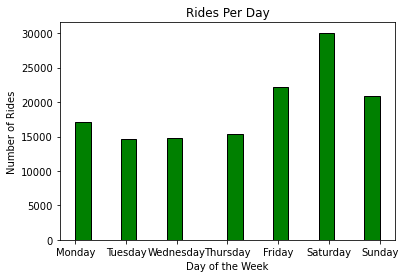

<Figure size 432x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [120]:
#Line plot for days of the week
plt.hist(july_trip.weekday, bins = 20, color = 'green', edgecolor = 'black')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Rides Per Day')
plt.figure(figsize=(6, 10))

plt.show()
plt.savefig('rides_per_day.jpg')

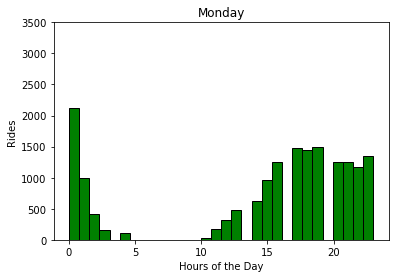

In [47]:
plt.hist(mon_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Monday')
plt.ylim([0, 3500])
plt.show()

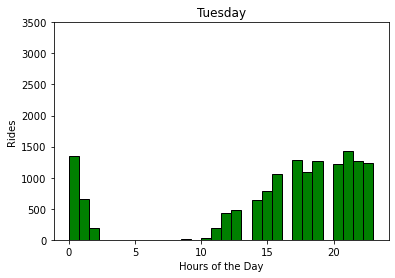

In [46]:
plt.hist(tues_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Tuesday')
plt.ylim([0, 3500])
plt.show()

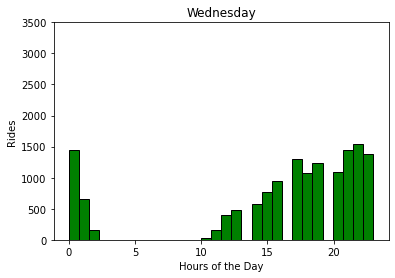

In [45]:
plt.hist(wed_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Wednesday')
plt.ylim([0, 3500])
plt.show()

(0.0, 3500.0)

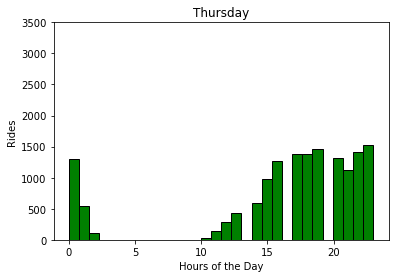

In [57]:
plt.hist(thurs_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Thursday')
plt.ylim([0, 3500])

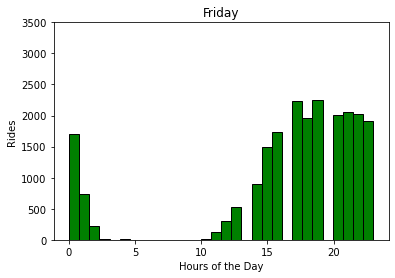

In [43]:
plt.hist(fri_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Friday')
plt.ylim([0, 3500])
plt.show()

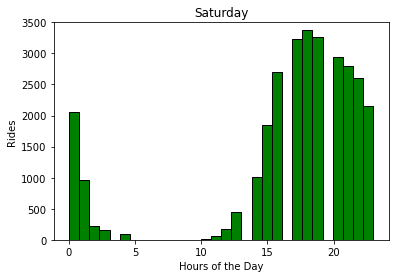

In [42]:
plt.hist(sat_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Saturday')
plt.ylim([0, 3500])
plt.show()

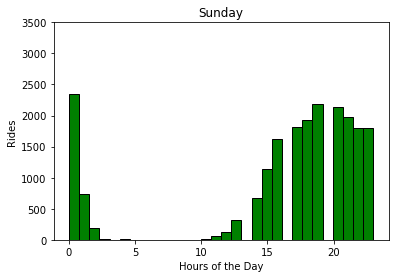

In [41]:
plt.hist(sun_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Sunday')
plt.ylim([0, 3500])
plt.show()

In [50]:
july_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,hour,weekday
0,2019-07-01 00:02:52.213,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,2021-10-26 00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,0,Monday
1,2019-07-01 00:02:52.213,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,2021-10-26 00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,0,Monday
2,2019-07-01 00:02:52.213,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,2021-10-26 00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,0,Monday
3,2019-07-01 00:02:52.213,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,2021-10-26 00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000,0,Monday
4,2019-07-01 00:02:52.213,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,2021-10-26 00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000,0,Monday


#Make geometry column for july_trip

In [67]:
july_trip['geometry'] = july_trip.apply(lambda x: Point((x.startLongitude, 
                                                         x.startLatitude)), 
                                        axis=1)
july_trip.head(3)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,hour,weekday,geometry
0,2019-07-01 00:02:52.213,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,2021-10-26 00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,0,Monday,POINT (-86.7516 36.1775)
1,2019-07-01 00:02:52.213,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,2021-10-26 00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,0,Monday,POINT (-86.7711 36.1627)
2,2019-07-01 00:02:52.213,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,2021-10-26 00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,0,Monday,POINT (-86.7713 36.1627)


#Bring in zipcodes df and merge with july_trips to create july_trip_geo

In [68]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [71]:
july_trip_geo = gpd.GeoDataFrame(july_trip, 
                           crs = zipcodes.crs, 
                           geometry = july_trip['geometry'])

In [73]:
rides_by_zip = gpd.sjoin(july_trip_geo, zipcodes, op = 'within')

In [74]:
rides_by_zip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLatitude,endLongitude,tripRoute,create_dt,hour,weekday,geometry,index_right,zip,po_name
0,2019-07-01 00:02:52.213,Bird,BRD5179,PoweredZSHKJ,2.00000,0.00000,2019-07-01 00:00:00,2021-10-26 00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,...,36.17780,-86.75140,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,0,Monday,POINT (-86.75160 36.17750),46,37206,NASHVILLE
26,2019-07-01 00:12:52.437,Bird,BRD5282,PoweredU1QWL,9.00000,0.00000,2019-07-01 00:00:00,2021-10-26 00:04:29.616666,2019-07-01 00:00:00,00:13:11.600000,...,36.17590,-86.76090,"[[36.176038,-86.76081],[36.175959,-86.760837],...",2019-07-02 05:30:19.340000,0,Monday,POINT (-86.76090 36.17600),46,37206,NASHVILLE
118,2019-07-01 00:32:53.757,Bird,BRD5463,Powered3HZZV,4.00000,0.00000,2019-07-01 00:00:00,2021-10-26 00:28:50.746666,2019-07-01 00:00:00,00:33:13.110000,...,36.17810,-86.75580,"[[36.178056,-86.755718],[36.177984,-86.75558],...",2019-07-02 05:30:22.107000,0,Monday,POINT (-86.75580 36.17800),46,37206,NASHVILLE
170,2019-07-01 00:43:26.033,Lyft,LFT62,Powered536423,6.95655,1633.85832,2019-07-01 00:00:00,2021-10-26 00:36:28.533333,2019-07-01 00:00:00,00:43:25.926666,...,36.17404,-86.75187,"[[36.1774,-86.74989],[36.17743,-86.74994],[36....",2019-07-02 09:34:38.727000,0,Monday,POINT (-86.74989 36.17740),46,37206,NASHVILLE
211,2019-07-01 00:52:54.660,Bird,BRD5629,PoweredTLSDM,10.00000,0.00000,2019-07-01 00:00:00,2021-10-26 00:42:58.593333,2019-07-01 00:00:00,00:53:08.036666,...,36.17920,-86.74680,"[[36.179298,-86.746625],[36.177447,-86.745683]]",2019-07-02 05:30:23.740000,0,Monday,POINT (-86.74670 36.17920),46,37206,NASHVILLE


In [96]:
scooters_in_37201 = rides_by_zip['zip'] == '37201'.intersection(rides_by_zip['hour'] == '7')
scooters_in_37201.shape

AttributeError: 'str' object has no attribute 'intersection'

In [104]:
rides_by_zip.loc[(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 9)]

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLatitude,endLongitude,tripRoute,create_dt,hour,weekday,geometry,index_right,zip,po_name
104308,2019-07-25 09:29:23.597,Bird,BRD2,Powered9Q272,4.0,0.0,2019-07-25 00:00:00,2021-10-26 09:25:36.450000,2019-07-25 00:00:00,09:29:33.696666,...,36.1622,-86.7762,"[[36.162095,-86.776111],[36.162231,-86.776123]...",2019-07-26 05:30:54.480000,9,Thursday,POINT (-86.77600 36.16270),24,37201,NASHVILLE
112902,2019-07-27 09:56:12.193,Bird,BRD5,Powered1BJ5N,2.0,0.0,2019-07-27 00:00:00,2021-10-26 09:55:06.833333,2019-07-27 00:00:00,09:57:34.520000,...,36.1584,-86.7770,"[[36.159353,-86.775517],[36.159656,-86.775519]...",2019-07-28 05:30:55.787000,9,Saturday,POINT (-86.77560 36.15960),24,37201,NASHVILLE


In [101]:
rides_by_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 134924 entries, 0 to 133904
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    134924 non-null  datetime64[ns]
 1   companyName     134924 non-null  object        
 2   tripRecordNum   134924 non-null  object        
 3   sumdID          134924 non-null  object        
 4   tripDuration    134924 non-null  float64       
 5   tripDistance    134924 non-null  float64       
 6   startDate       134924 non-null  object        
 7   startTime       134924 non-null  datetime64[ns]
 8   endDate         134924 non-null  object        
 9   endTime         134924 non-null  object        
 10  startLatitude   134924 non-null  float64       
 11  startLongitude  134924 non-null  float64       
 12  endLatitude     134924 non-null  float64       
 13  endLongitude    134924 non-null  float64       
 14  tripRoute       134924 non-n

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

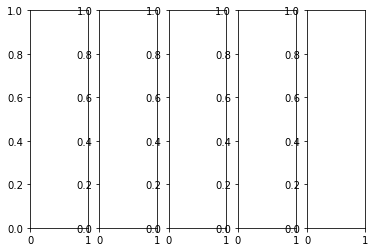

In [116]:
figure, axis = plt.subplots(1,5)

axis[0,0].hist(mon_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
axis[0,0].title('Monday')
plt.ylim([0, 3500])

axis[0,1].hist(tues_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
axis[0,1].title('Tuesday')
plt.ylim([0, 3500])